## **Name:- Reetika Gour**

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [6]:
data = pd.read_csv("/content/drive/MyDrive/mnist_train_unzipped/mnist_train.csv")

In [8]:
train_df, test_df = train_test_split(data, test_size=0.2)  #Split data into train and test.
train_labels = train_df["label"]
test_labels =test_df["label"]
train_data = train_df.drop("label",axis=1)
test_data = test_df.drop("label", axis=1)
train_data = np.array(train_data.T)/255.
test_data = np.array(test_data.T)/255.      #Normalize the data.
n, m = train_data.shape

In [9]:
def init_params(): #Initialize Parameters.
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5 
    b2 = np.random.rand(10, 1) - 0.5
    W3 = np.random.rand(10, 10) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    k0 = np.random.rand(1)
    k1 = np.random.rand(1)
    return W1, b1, W2, b2, W3, b3, k0, k1 

def activaton(Z, k0, k1):  #Define activation function.
    return k0 +(k1*Z)

def softmax(Z):            #Define softmax function
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, W3, b3, k0, k1, X):   #Define forward propagation.
    Z1 = W1.dot(X) + b1
    A1 = activaton(Z1, k0, k1)
    Z2 = W2.dot(A1) + b2
    A2 = activaton(Z2, k0, k1)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def actva_deri(Z, k0, k1):     #Derivative of activation function.
    return k1

def one_hot(Y):                #One hot encoding for labels.
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, k0, k1, X, Y):    #define backward propagation.
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    dA2 = W3.T.dot(dZ3)
    dZ2 = W3.T.dot(dZ3) * actva_deri(Z2, k0, k1)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dA1 = W2.T.dot(dZ2)
    dZ1 = W2.T.dot(dZ2) * actva_deri(Z1, k0, k1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    dk0 = np.average(dA1)
    dk1 = np.average(dA1*Z1)
    return dW1, db1, dW2, db2, dW3, db3, dk0, dk1

def update_params(W1, b1, W2, b2, W3, b3, k0, k1, dW1, db1, dW2, db2, dW3, db3, dk0, dk1, alpha):    #Update parameters.
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3  
    b3 = b3 - alpha * db3
    k0 = k0 - alpha * dk0
    k1 = k1 - alpha * dk1    
    return W1, b1, W2, b2, W3, b3, k0, k1

In [10]:
def loss_crossentropy(probas, y):          #Categorical cross entopy loss function.
  tanspose_probas = probas.T
  transpose_y = y.T
  training_point_loss = []
  for list_1, list_2 in zip(tanspose_probas, transpose_y):
    for i, j in zip(list_1, list_2):
      training_point_loss.append(np.sum(np.log(i)*(-j)))
  total_loss = np.mean(training_point_loss)
  return total_loss

def get_predictions(A3):                   #make Predictions
    return np.argmax(A3, 0)

def get_accuracy(predictions, Y):          #Define accuracy
    return np.sum(predictions == Y) / Y.size

def Test_loss_accuracy(X, W1, b1, W2, b2, W3, b3, k0, k1):     #loss-accuracy calculation for test data.
    Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, k0, k1, X)
    Test_loss = loss_crossentropy(A3, one_hot(test_labels))
    Test_accuracy = get_accuracy(get_predictions(A3), test_labels)
    return Test_loss, Test_accuracy    

In [23]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3, k0, k1 = init_params()
    Train_loss_lst, Train_accuracy_lst, Test_loss_lst, Test_accuracy_lst = [], [], [], []
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, k0, k1, X)
        dW1, db1, dW2, db2, dW3, db3, dk0, dk1 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, k0, k1, X, Y)
        W1, b1, W2, b2, W3, b3, k0, k1 = update_params(W1, b1, W2, b2, W3, b3, k0, k1, dW1, db1, dW2, db2, dW3, db3, dk0, dk1,alpha)
        if i % 10 == 0:
          print("\033[1m" + "Iteration" + "\033[0m", i)
          total_loss = loss_crossentropy(A3, one_hot(Y))
          Train_accuracy = get_accuracy(get_predictions(A3), Y)
          Test_loss, Test_accuracy = Test_loss_accuracy(test_data, W1, b1, W2, b2, W3, b3, k0, k1)
          Train_loss_lst.append(total_loss), Train_accuracy_lst.append(Train_accuracy), Test_loss_lst.append(Test_loss), Test_accuracy_lst.append(Test_accuracy)
          print("k0 and k1:", k0, k1)
    return W1, b1, W2, b2, W3, b3, k0, k1, Train_loss_lst, Train_accuracy_lst, Test_loss_lst, Test_accuracy_lst

#### **Model training.**

In [24]:
W1, b1, W2, b2, W3, b3, k0, k1, Train_loss_lst, Train_accuracy_lst, Test_loss_lst, Test_accuracy_lst = gradient_descent(train_data, train_labels, 0.10, 500)

Iteration 0
k0 and k1: [0.32337364] [0.62979075]
Iteration 10
k0 and k1: [0.3193233] [0.61486158]
Iteration 20
k0 and k1: [0.31575806] [0.63227226]
Iteration 30
k0 and k1: [0.31321443] [0.66437872]
Iteration 40
k0 and k1: [0.31193673] [0.70133117]
Iteration 50
k0 and k1: [0.31127478] [0.73654683]
Iteration 60
k0 and k1: [0.31050144] [0.76670131]
Iteration 70
k0 and k1: [0.30963205] [0.79071048]
Iteration 80
k0 and k1: [0.30884583] [0.80900672]
Iteration 90
k0 and k1: [0.30818419] [0.82269646]
Iteration 100
k0 and k1: [0.3076251] [0.83294297]
Iteration 110
k0 and k1: [0.3071379] [0.84072317]
Iteration 120
k0 and k1: [0.30669712] [0.84677464]
Iteration 130
k0 and k1: [0.3062841] [0.85162119]
Iteration 140
k0 and k1: [0.30588595] [0.8556222]
Iteration 150
k0 and k1: [0.30549428] [0.85902025]
Iteration 160
k0 and k1: [0.30510398] [0.86197831]
Iteration 170
k0 and k1: [0.30471227] [0.86460624]
Iteration 180
k0 and k1: [0.30431793] [0.86697874]
Iteration 190
k0 and k1: [0.30392077] [0.869147

#### **Train_vs_Test Loss and Train_vs_Test Accuracy.**

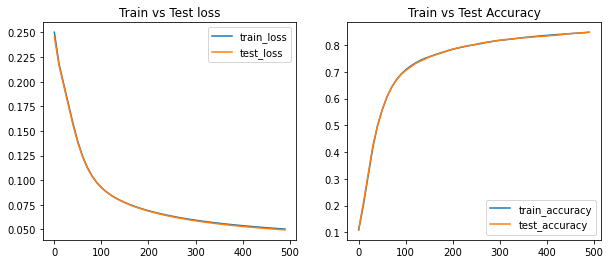

In [47]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
epochs = list(range(0,500, 10))
sns.lineplot(epochs,Train_loss_lst,label='train_loss', ax=ax1)
sns.lineplot(epochs,Test_loss_lst,label='test_loss', ax=ax1)
sns.lineplot(epochs,Train_accuracy_lst,label='train_accuracy', ax=ax2)
sns.lineplot(epochs,Test_accuracy_lst,label='test_accuracy', ax=ax2)
ax1.title.set_text("Train vs Test loss")
ax2.title.set_text("Train vs Test Accuracy")
plt.show()

#### **Final values for parameters k0 and k1.**

In [19]:
print("k0:", k0)
print("k1:", k1)

k0: [0.41525014]
k1: [0.98952922]


In [20]:
def make_predictions(X, W1, b1, W2, b2, W3, b3, k0, k1):
  Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, k0, k1, X)
  predict_labels = get_predictions(A3)
  return predict_labels

**F1-Score.**

In [22]:
prdicted_labels = make_predictions(test_data, W1, b1, W2, b2, W3, b3, k0, k1)
ture_labels = test_labels
print(f1_score(ture_labels, prdicted_labels, average='weighted'))

0.859968703772787
